# 1 - Understanding datetime package

It seems, after some dwerping on the internet, that there is positively no easy way to produce a set of dates with incrementing months (like can be done easily in Excel) within python because of the absolutely strange implementation of the datetime package.

The timedelta object doesn't have any way of setting this although it has a weeks attribute.  In other words, this works

In [1]:
start_epoch = dt.date(2000,1,1)

In [2]:
temp = start_epoch + dt.timedelta(days=31)

In [3]:
temp

datetime.date(2000, 2, 1)

but this doesn't

In [4]:
temp = start_epoch + dt.timedelta(months = 1)

TypeError: 'months' is an invalid keyword argument for this function

and because of leap days there is no easy way to make this work.

With a little bit a programming legerdemain (and after rejecting the inadequate answers on the internet) I have come up with a very nice way of getting around this issue.

In [5]:
def is_leap_year(year):
    if year % 4 == 0 and year % 400 == 0:
            return True
    elif year % 4 == 0 and year % 100 != 0:
            return True
    else:
        return False        

In [6]:
def add_a_month(epoch):
    days_per_month_no_leap = [31,28,31,30,31,30,31,31,30,31,30,31]
    days_per_month_leap    = [31,29,31,30,31,30,31,31,30,31,30,31]
    
    year  = epoch.year
    month = epoch.month
    if is_leap_year(year):
        delta_t = dt.timedelta(days=days_per_month_leap[month-1])
    else:
        delta_t = dt.timedelta(days=days_per_month_no_leap[month-1])

    return epoch + delta_t

Now to create some dates and some random values to go along with these dates

In [7]:
my_dates = [dt.date(1999,11,1)]
for i in range(16):
    my_dates.append(add_a_month(my_dates[i]))

In [8]:
my_dates

[datetime.date(1999, 11, 1),
 datetime.date(1999, 12, 1),
 datetime.date(2000, 1, 1),
 datetime.date(2000, 2, 1),
 datetime.date(2000, 3, 1),
 datetime.date(2000, 4, 1),
 datetime.date(2000, 5, 1),
 datetime.date(2000, 6, 1),
 datetime.date(2000, 7, 1),
 datetime.date(2000, 8, 1),
 datetime.date(2000, 9, 1),
 datetime.date(2000, 10, 1),
 datetime.date(2000, 11, 1),
 datetime.date(2000, 12, 1),
 datetime.date(2001, 1, 1),
 datetime.date(2001, 2, 1),
 datetime.date(2001, 3, 1)]

In [9]:
my_values = np.zeros(len(my_dates))
for i in range(len(my_dates)):
    my_values[i] = np.abs(np.random.normal(30,45))

In [10]:
my_values

array([  57.22636246,   35.94447924,   11.34694493,    5.08428341,
         80.55025052,   86.89562889,   77.35075459,   40.7215563 ,
         43.24641789,   26.1707395 ,   38.51223603,   10.78964571,
         45.25970194,  114.22212219,    6.4649279 ,   37.20652977,
         86.53517368])

In [11]:
import matplotlib.ticker as ticker

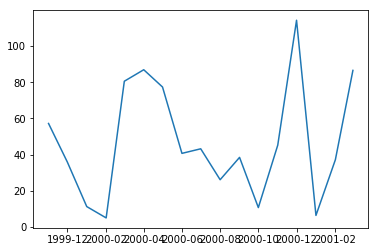

In [12]:
plt.plot(my_dates,my_values)
plt.show()

Clearly the x-axis sucks.  So now, how to improve it?

# 2 - Understanding matplotlib

Before diving into how to improve how dates are displayed along the x-axis, a clear understanding of how matplotlib constructs ticks on the x-axis and their corresponding labels is required.

Matplotlib begins by hierarchically dividing several types of objects.  The first division is between *major* and *minor* ticks, called respectively just ***ticks*** and ***minorticks***.  The second division is between ***locators*** and ***formatters*** which find (or locate) the ticks and subsequently format their labels. 

The *major* and *minor* ticks are owned, in the getter/setter approach (the approach that doesn't use the ***pyplot*** interactive approach, by an ***axis*** object, which itself is owned by an ***axes*** object.



To explore and illustrate, let's convert all of the datetime objects created above to numbers using the ***date2num*** function in ***matplotlib.dates***.  This will then form the values for the x-axis.

In [145]:
my_dnums = np.array([mdates.date2num(my_dates[i]) for i in range(len(my_dates))])

Now a simple plot, with no overrides of the ***matplotlib*** defaults, provides a plot that looks like this

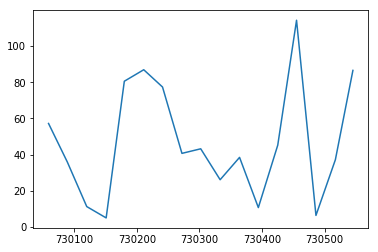

In [146]:
fig_p = plt.figure()
ax_p  = fig_p.add_subplot(1,1,1)
ax_p.plot(my_dnums,my_values)
plt.show()

and which has the number of days from 01-01-0001 (why I'll never know this epoch was chosen as a reference - but whatever).   

Notice that matplotlib has chosen to place the ticks on the *100's* even though the first epoch is 730059.0.  In addition, there are no minor ticks.  All of these things can be manipulated but not in an obvious way.

The first step is to locate the ticks via a ***locator***.  All of them are found in the ***ticker*** module (***matplotlib.ticker***) and one of the most interesting ones is the ***MultipleLocator***, which places the ticks on the multiples of a given number.

For example, picking the major multiple to 137 gives ticks at 730073, 730210, 730347, 730484 (plus two extras - one on each end as seen by querying xticklabels()).

One can also use the ***MultipleLocator(19)*** specification for the minor ticks to see ticks at multiples of 19 starting at 730037.

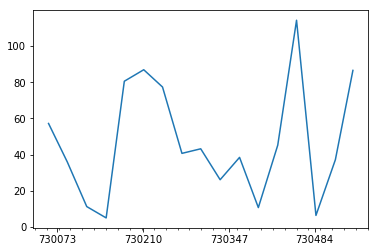

Query xticks
Text(0,0,u'')
Text(730073,0,u'730073')
Text(730210,0,u'730210')
Text(730347,0,u'730347')
Text(730484,0,u'730484')
Text(0,0,u'')

Query xminorticks
Text(0,0,u'')
Text(730037,0,u'')
Text(730056,0,u'')
Text(730075,0,u'')
Text(730094,0,u'')
Text(730113,0,u'')
Text(730132,0,u'')
Text(730151,0,u'')
Text(730170,0,u'')
Text(730189,0,u'')
Text(730208,0,u'')
Text(730227,0,u'')
Text(730246,0,u'')
Text(730265,0,u'')
Text(730284,0,u'')
Text(730303,0,u'')
Text(730322,0,u'')
Text(730341,0,u'')
Text(730360,0,u'')
Text(730379,0,u'')
Text(730398,0,u'')
Text(730417,0,u'')
Text(730436,0,u'')
Text(730455,0,u'')
Text(730474,0,u'')
Text(730493,0,u'')
Text(730512,0,u'')
Text(730531,0,u'')
Text(730550,0,u'')
Text(730569,0,u'')
Text(0,0,u'')


In [150]:
fig_p = plt.figure()
ax_p  = fig_p.add_subplot(1,1,1)
ax_p.plot(my_dnums,my_values)
ax_p.xaxis.set_major_locator(ticker.MultipleLocator(137))
ax_p.xaxis.set_minor_locator(ticker.MultipleLocator(19))
plt.show()
print 'Query xticks'
for xx in ax_p.get_xticklabels():
    print xx

print 
print 'Query xminorticks'
for xx in ax_p.get_xminorticklabels():
    print xx    

The major and minor ticks can be assigned a formatter that governs how the strings (last entry in the tuples shown above) are constructed.  In the case of the minor ticks, this makes the blank string something other than blank.

For example, say that we want the python days (the result of ***date2num***) to be decorated with a 'd' on the front (to emphasize it is a day) and to make it an integer rather than a float.  Then used the ***ticker.FormatStrFormatter("d%d")***.

Also say we want the minor ticks labeled in a similar way but oriented vertically so that they pack in properly; then ***ticker.FormatStrFormatter("m%d&nbsp;&nbsp;&nbsp;&nbsp;")*** is the formatter to be used where the 4 installments of white space are needed to offset the minortick labels from the x-axis.

Finally, a call to ***plt.setp(ax_p.get_xminorticklabels(),rotation=90)*** allows for the minor labels to printed vertically.

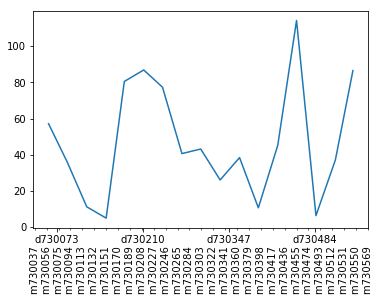

Query xticks
Text(0,0,u'')
Text(730073,0,u'd730073')
Text(730210,0,u'd730210')
Text(730347,0,u'd730347')
Text(730484,0,u'd730484')
Text(0,0,u'')

Query xminorticks
Text(0,0,u'')
Text(730037,0,u'm730037    ')
Text(730056,0,u'm730056    ')
Text(730075,0,u'm730075    ')
Text(730094,0,u'm730094    ')
Text(730113,0,u'm730113    ')
Text(730132,0,u'm730132    ')
Text(730151,0,u'm730151    ')
Text(730170,0,u'm730170    ')
Text(730189,0,u'm730189    ')
Text(730208,0,u'm730208    ')
Text(730227,0,u'm730227    ')
Text(730246,0,u'm730246    ')
Text(730265,0,u'm730265    ')
Text(730284,0,u'm730284    ')
Text(730303,0,u'm730303    ')
Text(730322,0,u'm730322    ')
Text(730341,0,u'm730341    ')
Text(730360,0,u'm730360    ')
Text(730379,0,u'm730379    ')
Text(730398,0,u'm730398    ')
Text(730417,0,u'm730417    ')
Text(730436,0,u'm730436    ')
Text(730455,0,u'm730455    ')
Text(730474,0,u'm730474    ')
Text(730493,0,u'm730493    ')
Text(730512,0,u'm730512    ')
Text(730531,0,u'm730531    ')
Text(730550,

In [162]:
fig_p = plt.figure()
ax_p  = fig_p.add_subplot(1,1,1)
ax_p.plot(my_dnums,my_values)
ax_p.xaxis.set_major_locator(ticker.MultipleLocator(137))
ax_p.xaxis.set_minor_locator(ticker.MultipleLocator(19))
ax_p.xaxis.set_major_formatter(ticker.FormatStrFormatter("d%d"))
ax_p.xaxis.set_minor_formatter(ticker.FormatStrFormatter("m%d    "))
plt.setp(ax_p.get_xminorticklabels(),rotation=90)
plt.show()

print 'Query xticks'
for xx in ax_p.get_xticklabels():
    print xx

print 
print 'Query xminorticks'
for xx in ax_p.get_xminorticklabels():
    print xx    

An interesting case evolves when we want to replace the major tick labels with 'categorical' labels.  For example, if 730073 were a special day called 'A' (and likewise for the other major tick label days) then we can override the tick labels as follows:

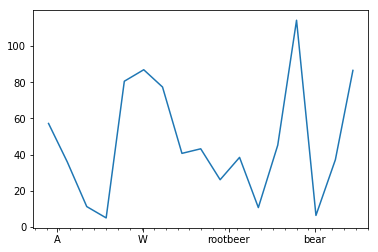

Query xticks
Text(0,0,u'dummp')
Text(730073,0,u'A')
Text(730210,0,u'W')
Text(730347,0,u'rootbeer')
Text(730484,0,u'bear')
Text(0,0,u'skippy')

Query xminorticks
Text(0,0,u'')
Text(730037,0,u'')
Text(730056,0,u'')
Text(730075,0,u'')
Text(730094,0,u'')
Text(730113,0,u'')
Text(730132,0,u'')
Text(730151,0,u'')
Text(730170,0,u'')
Text(730189,0,u'')
Text(730208,0,u'')
Text(730227,0,u'')
Text(730246,0,u'')
Text(730265,0,u'')
Text(730284,0,u'')
Text(730303,0,u'')
Text(730322,0,u'')
Text(730341,0,u'')
Text(730360,0,u'')
Text(730379,0,u'')
Text(730398,0,u'')
Text(730417,0,u'')
Text(730436,0,u'')
Text(730455,0,u'')
Text(730474,0,u'')
Text(730493,0,u'')
Text(730512,0,u'')
Text(730531,0,u'')
Text(730550,0,u'')
Text(730569,0,u'')
Text(0,0,u'')


In [165]:
my_ticks = ['dummp','A','W','rootbeer','bear','skippy']
fig_q = plt.figure()
ax_q  = fig_q.add_subplot(1,1,1)
ax_q.plot(my_dnums,my_values)
ax_q.xaxis.set_major_locator(ticker.MultipleLocator(137))
ax_q.xaxis.set_minor_locator(ticker.MultipleLocator(19))
ax_q.set_xticklabels(my_ticks)
plt.show()

print 'Query xticks'
for xx in ax_q.get_xticklabels():
    print xx

print 
print 'Query xminorticks'
for xx in ax_q.get_xminorticklabels():
    print xx    

With all that firmly in hand, the transition to calendar labels is actually fairly trivial.  The primary differences being that one uses new locators that know how to pick out days-of-week, or months, and so on, and that the formatters use the standard ***strftime*** format keys used in python proper.

So suppose we want to plot the same data but this time, instead of using modified-python-date (or MPD - a term I just coined for this), we use actual datetime objects.

We can locate the four quarters as major ticks using ***matplotlib.dates.MonthLocator([1,4,7,10])***; every thirty days (keyed from the absolute value of MPD and not as an offset from the starting MPD) can be found using ***ticker.MultipleLocator(30)***.  In other words, one can mix-and-match locators from the ***dates*** module with those from the ***ticker*** module.

Both the major and minor formatter are chose to be the ***matplotlib.dates.DateFormatter*** with different ***strftime*** arguments.

Finally, the standard trick of rotating and offsetting the minor ticks will be used and the resulting plot is:

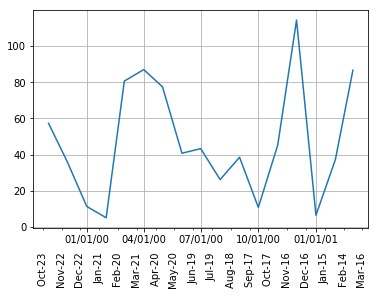

Query xticks
Text(730120,0,u'01/01/00')
Text(730211,0,u'04/01/00')
Text(730302,0,u'07/01/00')
Text(730394,0,u'10/01/00')
Text(730486,0,u'01/01/01')

Query xminorticks
Text(0,0,u'')
Text(730050,0,u'Oct-23      ')
Text(730080,0,u'Nov-22      ')
Text(730110,0,u'Dec-22      ')
Text(730140,0,u'Jan-21      ')
Text(730170,0,u'Feb-20      ')
Text(730200,0,u'Mar-21      ')
Text(730230,0,u'Apr-20      ')
Text(730260,0,u'May-20      ')
Text(730290,0,u'Jun-19      ')
Text(730320,0,u'Jul-19      ')
Text(730350,0,u'Aug-18      ')
Text(730380,0,u'Sep-17      ')
Text(730410,0,u'Oct-17      ')
Text(730440,0,u'Nov-16      ')
Text(730470,0,u'Dec-16      ')
Text(730500,0,u'Jan-15      ')
Text(730530,0,u'Feb-14      ')
Text(730560,0,u'Mar-16      ')
Text(0,0,u'')


In [168]:
fig_d       = plt.figure()
ax_d        = fig_d.add_subplot(1,1,1)
months      = mdates.MonthLocator([1,4,7,10])
mform       = mdates.DateFormatter("%m/%d/%y")
dform       = mdates.DateFormatter("%b-%d      ")
thirty_days = ticker.MultipleLocator(30)
ax_d.get_xaxis().set_major_locator(months)
ax_d.get_xaxis().set_minor_locator(thirty_days)
ax_d.get_xaxis().set_major_formatter(mform)
ax_d.get_xaxis().set_minor_formatter(dform)
plt.setp(ax_d.get_xminorticklabels(),rotation=90)
ax_d.plot(my_dates,my_values)
ax_d.grid('on')
plt.show()

print 'Query xticks'
for xx in ax_d.get_xticklabels():
    print xx

print 
print 'Query xminorticks'
for xx in ax_d.get_xminorticklabels():
    print xx 